In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Loading the dataset

In [ ]:
data = pd.read_csv('diabetes.csv', delimiter=',')
features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]] = data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]].replace(0,data.mean(axis=0))
outcome = data.iloc[:,8]
print(data)
print(data.describe().T)



     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

Try to use the softUmput from GitHub open resource but it didn't work

In [ ]:
# from soft_impute import SoftImpute
# clf = SoftImpute(J=1, lambda_=2.0)
# X_test = data.to_numpy().copy()
# fit = clf.fit(X_test)
# imputed = clf.predict(X_test)
# k = imputed[:,0]
# plt.hist(k,bins = [0,2,4,6,8,10,12,14,16]) 
# plt.title("histogram") 
# plt.show()

#Data Normalization

In [ ]:
d = preprocessing.normalize(data.iloc[:,0:8], axis=0)
scaled_df = pd.DataFrame(d, columns = features)
scaled_df = pd.concat([scaled_df, outcome], axis=1)


array([[<Axes: title={'center': 'Glucose'}>]], dtype=object)

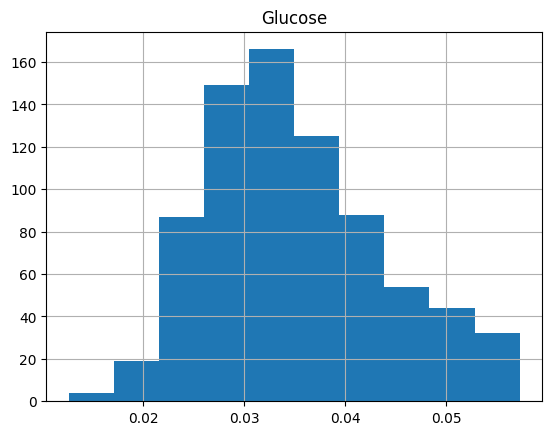

In [ ]:
scaled_df.hist(column="Glucose")

array([[<Axes: title={'center': 'BloodPressure'}>]], dtype=object)

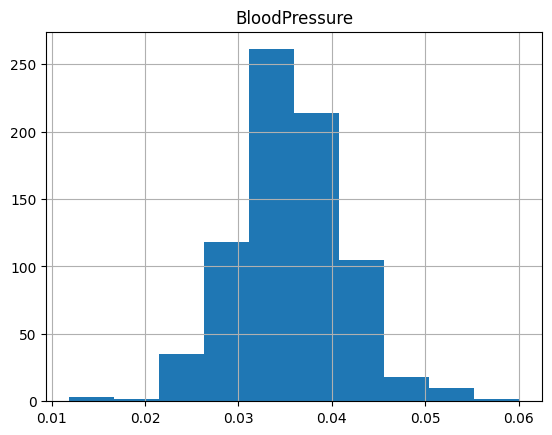

In [ ]:
scaled_df.hist(column="BloodPressure")

In [ ]:
X = scaled_df.iloc[:,0:8].to_numpy()
y = data.iloc[:,8].to_numpy()


#Split the dataset and train the model

In [ ]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=5)

In [ ]:
x_train_df = pd.DataFrame(x_train,columns = features)
x_test_df = pd.DataFrame(x_test,columns = features)

In [ ]:
model = Sequential()
model.add(Dense(12,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), input_shape=(8,), activation='relu'))
model.add(Dense(8,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), activation='relu'))
model.add(Dense(1,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)
# evaluate the keras model
# test DS
#training error
_, accuracy = model.evaluate(x_train, y_train, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

predictions = (model.predict(x_test) > 0.5).astype(int)

# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (x_test[i].tolist(), predictions[i], y_test[i]))

Accuracy: 76.91
8/8 [==============================] - 0s 4ms/step
[0.042359742733119723, 0.026468013734211867, 0.030537300807401756, 0.04081093651464417, 0.030155216874819788, 0.034811354622936566, 0.005320730020922629, 0.047079059916829195] => 0 (expected 0)
[0.0352997856109331, 0.037975845792564855, 0.039402968783744205, 0.02619100303991568, 0.019098179371178546, 0.029154509496709377, 0.011643009222254223, 0.07061858987524379] => 0 (expected 0)
[0.021179871366559862, 0.030495754954635412, 0.03546267190536978, 0.02619100303991568, 0.019098179371178546, 0.028066654664742608, 0.012957542521540988, 0.02763336125553018] => 0 (expected 0)
[0.028239828488746482, 0.02848188434442364, 0.033492523466182575, 0.048462987111139944, 0.019098179371178546, 0.03568163848850998, 0.009076539447456249, 0.03377410820120355] => 0 (expected 0)
[0.028239828488746482, 0.027618796940047166, 0.02758207814862094, 0.021680810023404714, 0.011727028784652139, 0.02262738050490877, 0.021282920083690517, 0.026609903

# Class contrastive analysis: Max Max - Min Min

In [ ]:
def max_calcuation(arr):
  max = np.max(arr, axis =0)
  return max

In [ ]:
def min_calcuation(arr):
  min = np.min(arr, axis =0)
  return min

In [ ]:
def max_matrix(arr,model):
  prediction_max = []
  for i in range(len(arr)):
    row_index = 0
    X_single= np.full((28,8),arr[i])
    for m in range(8):
      for j in range(m+1,8):
       X_single[row_index][m] = max[m]
       X_single[row_index][j] = max[j]
       row_index +=1
    predictions_sub_max = model.predict(X_single).reshape((1,28))
    if len(prediction_max) == 0:
      prediction_max = predictions_sub_max
    else:
      prediction_max = np.concatenate((prediction_max, predictions_sub_max), axis=1)
  prediction_max = prediction_max.reshape((231,28))
  return prediction_max


In [ ]:
def min_matrix(arr,model):
  prediction_min = []
  for i in range(len(arr)):
    row_index = 0
    X_single= np.full((28,8),arr[i])
    for m in range(8):
      for j in range(m+1,8):
       X_single[row_index][m] = min[m]
       X_single[row_index][j] = min[j]
       row_index +=1
    predictions_sub_min = model.predict(X_single).reshape((1,28))
    if len(prediction_min) == 0:
      prediction_min = predictions_sub_min
    else:
      prediction_min = np.concatenate((prediction_min, predictions_sub_min), axis=1)
  prediction_min = prediction_min.reshape((231,28))
  return prediction_min

In [ ]:
testX = np.copy(x_test)
max = max_calcuation(testX)
min = min_calcuation(testX)
# MaxMax = [[0 for x in range(28)] for y in range(len(x_test))]

In [ ]:
prediction_max = max_matrix(x_test,model)
prediction_min = min_matrix(x_test,model)
result = np.subtract(prediction_max, prediction_min)
heatmap_diff = pd.DataFrame(result)

1/1 [==============================] - 0s 25ms/step


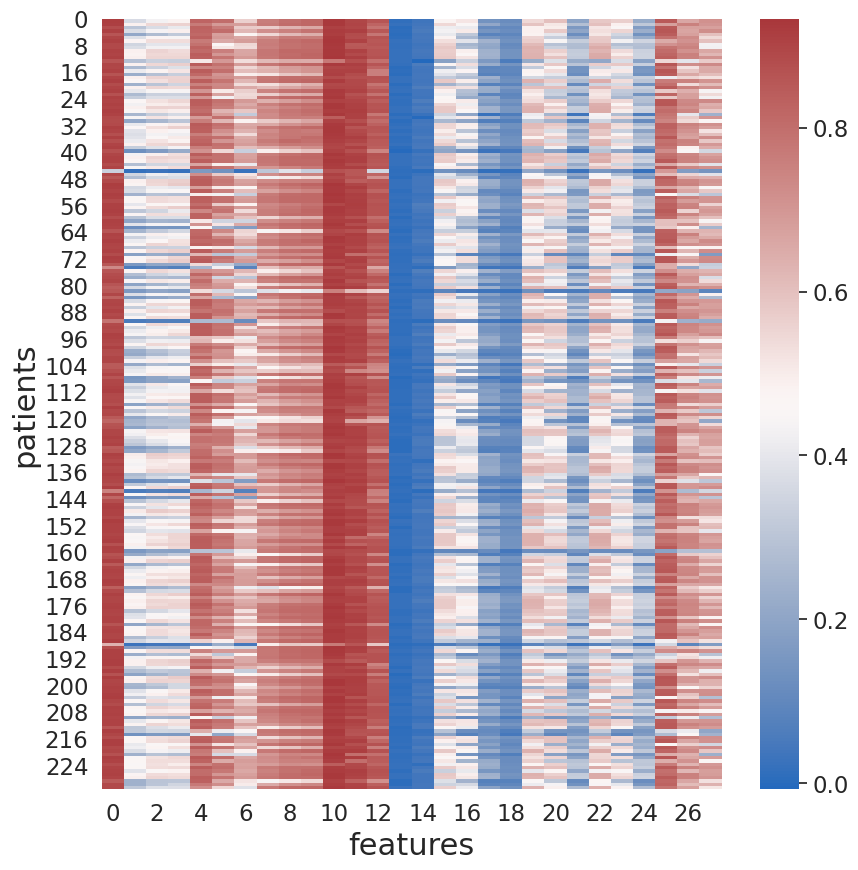

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
# ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)
ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True))
# ax = sns.heatmap(heatmap_diff,cmap = 'cool')
plt.xlabel('features',fontsize=22)
plt.ylabel('patients',fontsize=22)
plt.savefig('2d_heatmap.eps', format='eps')